# GRONESTATS
Utilizamos ScraperFC de mi repositorio en GitHub ya que tiene incluidos los datos de la Liga 1 Max de Peru

In [26]:
import ScraperFC as sfc
import pandas as pd
import numpy as np
from scipy import stats
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch, Pitch
import plotly.graph_objects as go
import os

In [2]:
%matplotlib inline

In [27]:
sofascore = sfc.Sofascore()

## DICCIONARIOS

In [4]:
nombres_jornadas = {
    "J1": "Jornada 1 - Local vs Universidad Cesar Vallejo",
    "J2": "Jornada 2 - Visita vs Alianza Atlético de Sullana",
    "J3": "Jornada 3 - Local vs Universitario de Deportes",
    "J4": "Jornada 4 - Visita vs Unión Comercio",
    "J5": "Jornada 5 - Local vs Comerciantes Unidos",
    "J6": "Jornada 6 - Visita vs ADT",
    "J7": "Jornada 7 - Local vs Sporting Cristal",
    "J8": "Jornada 8 - Visita vs Cienciano",
    "J9": "Jornada 9 - Local vs Los Chankas",
    "J10": "Jornada 10 - Visita vs Carlos Manucci",
    "C1": "Jornada 1 - Local vs Fluminense",
    "C2": "Jornada 2 - Visita vs Cerro Porteño",
}

In [5]:
URLs_jornadas = {
    "J1": "https://www.sofascore.com/universidad-cesar-vallejo-alianza-lima/lWsGfc#11967822",
    "J2": "https://www.sofascore.com/alianza-lima-alianza-atletico-de-sullana/hWslW#11981247",
    "J3": "https://www.sofascore.com/alianza-lima-universitario-de-deportes/fWslW#12005095",
    "J4": "https://www.sofascore.com/union-comercio-alianza-lima/lWsGtu#12019977",
    "J5": "https://www.sofascore.com/comerciantes-unidos-alianza-lima/lWsjxKb#12061051",
    "J6": "https://www.sofascore.com/asociacion-deportiva-tarma-alianza-lima/lWshlJc#12076348",
    "J7": "https://www.sofascore.com/alianza-lima-club-sporting-cristal/cWslW#12101149",
    "J8": "https://www.sofascore.com/alianza-lima-cienciano/bWslW#12120946",
    "J9": "https://www.sofascore.com/los-chankas-cyc-alianza-lima/lWseVac#12165423",
    "J10": "https://www.sofascore.com/carlos-mannucci-alianza-lima/lWsVUac#12194148",
    "C1": "https://www.sofascore.com/alianza-lima-fluminense/lOslW#12172415",
    "C2": "https://www.sofascore.com/cerro-porteno-alianza-lima/lWsQuc#12172422",
}

In [6]:
columns_en = ['goals', 'yellowCards', 'redCards', 'groundDuelsWon', 'groundDuelsWonPercentage', 'aerialDuelsWon', 'aerialDuelsWonPercentage', 'successfulDribbles', 'successfulDribblesPercentage', 'tackles', 'assists', 'accuratePassesPercentage', 'totalDuelsWon', 'totalDuelsWonPercentage', 'minutesPlayed', 'wasFouled', 'fouls', 'dispossessed', 'appearances', 'saves', 'savedShotsFromInsideTheBox','savedShotsFromOutsideTheBox', 'goalsConcededInsideTheBox', 'goalsConcededOutsideTheBox', 'highClaims', 'successfulRunsOut', 'punches', 'runsOut', 'accurateFinalThirdPasses', 'bigChancesCreated', 'accuratePasses', 'keyPasses', 'accurateCrosses', 'accurateCrossesPercentage', 'accurateLongBalls', 'accurateLongBallsPercentage', 'interceptions', 'clearances', 'dribbledPast', 'bigChancesMissed', 'totalShots', 'shotsOnTarget', 'blockedShots', 'goalConversionPercentage', 'hitWoodwork', 'offsides', 'errorLeadToGoal','errorLeadToShot', 'passToAssist','started', 'cleanSheets', 'possesionLost', 'passToAssist']

## OBTENCION DE DATOS LIGA 1 2023 y 2024

### Liga 1 2023

In [8]:
#Datos Liga 1 2023
dfLiga1_2023 = sofascore.scrape_league_stats("2023","Peru Liga 1")

End of the pages


In [9]:
# Limpieza y preprocesamiento general
dfLiga1_2023 = dfLiga1_2023.sort_values(by='team', ascending=True)
team_index = dfLiga1_2023.columns.get_loc('team')
dfLiga1_2023.insert(0, 'team', dfLiga1_2023.pop('team'))
player_index = dfLiga1_2023.columns.get_loc('player')
dfLiga1_2023.insert(0, 'player', dfLiga1_2023.pop('player'))
columns_to_drop = dfLiga1_2023.columns[dfLiga1_2023.isna().all() | (dfLiga1_2023 == 0).all()]
dfLiga1_2023 = dfLiga1_2023.drop(columns=columns_to_drop)
dfLiga1_2023[columns_en] = dfLiga1_2023[columns_en].astype(float)
print("Columnas eliminadas:", columns_to_drop)

Columnas eliminadas: Index(['expectedGoals'], dtype='object')


In [10]:
dfLiga1_2023.head()

player         team  goals  yellowCards  redCards  \
58     Diego Ramírez  AD Cantolao    0.0          4.0       1.0   
87  Cristian Sanchez  AD Cantolao    0.0          4.0       1.0   
38     Pier Larrauri  AD Cantolao    0.0          0.0       0.0   
50  Rafael Guarderas  AD Cantolao    0.0          8.0       1.0   
37         Jean Lara  AD Cantolao    0.0          0.0       0.0   

    groundDuelsWon  groundDuelsWonPercentage  aerialDuelsWon  \
58           112.0                     54.37            18.0   
87            21.0                     38.18             3.0   
38             0.0                      0.00             0.0   
50            67.0                     41.10            15.0   
37             0.0                      0.00             0.0   

    aerialDuelsWonPercentage  successfulDribbles  ...  bigChancesMissed  \
58                     40.91                22.0  ...               3.0   
87                     25.00                 0.0  ...               0.0   
38                      0.00                 0.0  ...               0.0   
50                     57.69                12.0  ...               0.0   
37                      0.00                 0.0  ...               0.0   

    totalShots  shotsOnTarget  blockedShots  goalConversionPercentage  \
58        19.0            6.0           6.0                       0.0   
87        19.0            0.0           9.0                       0.0   
38         0.0            0.0           0.0                       0.0   
50        11.0            2.0           6.0                       0.0   
37         0.0            0.0           0.0                       0.0   

    hitWoodwork  offsides  errorLeadToGoal  errorLeadToShot  passToAssist  
58          0.0       3.0              0.0              0.0           0.0  
87          1.0       1.0              0.0              0.0           0.0  
38          0.0       0.0              0.0              0.0           0.0  
50          0.0       3.0              0.0              0.0           0.0  
37          0.0       0.0              0.0              0.0           0.0  

[5 rows x 51 columns]

In [11]:
alianza_lima_2023_df = dfLiga1_2023[dfLiga1_2023['team'] == 'Alianza Lima'] #Obtenemos los datos completos de los jugadores de Alianza Lima en 2023

In [12]:
dfLiga1_2023 = dfLiga1_2023[dfLiga1_2023['team'] != 'Alianza Lima'] #Para obtener datos y promedios sin tomar en cuenta a jugadores de AL

In [13]:
alianza_lima_2023_df = alianza_lima_2023_df.drop(columns=['team']) #No mostrar Alianza Lima en una columna repetida

In [14]:
dfLiga1_2023.to_excel(f"Archivos para el tablero final/Datos totales 2023.xlsx", engine='openpyxl')

In [15]:
alianza_lima_2023_df.to_excel(f"Archivos para el tablero final/Datos totales Alianza Lima 2023.xlsx",engine='openpyxl')

### Liga 1 2024

In [8]:
dfLiga1_2024 = sofascore.scrape_league_stats("2024","Peru Liga 1")

In [9]:
print(dfLiga1_2024) #Qué pasó ?

                 player                        team
0    Martín Cauteruccio       Club Sporting Cristal
1           Luis Garcia         Comerciantes Unidos
2       Carlos Zambrano                Alianza Lima
3        Yoshimar Yotún       Club Sporting Cristal
4       Bernardo Cuesta                      Melgar
..                  ...                         ...
5         Víctor Cedrón  Asociación Deportiva Tarma
6   Sebastián Rodríguez                Alianza Lima
7   Cristian Bordacahar                      Melgar
8      Sebastián Britos   Universitario De Deportes
9           Iván Colman                    Cusco FC

[1000 rows x 2 columns]


In [10]:
df_Liga1_2024_90s = sofascore.scrape_league_stats("2024","Peru Liga 1","perMatch")

In [11]:
print(df_Liga1_2024_90s)

                 player                        team
0    Martín Cauteruccio       Club Sporting Cristal
1           Luis Garcia         Comerciantes Unidos
2       Carlos Zambrano                Alianza Lima
3        Yoshimar Yotún       Club Sporting Cristal
4       Bernardo Cuesta                      Melgar
..                  ...                         ...
5         Víctor Cedrón  Asociación Deportiva Tarma
6   Sebastián Rodríguez                Alianza Lima
7   Cristian Bordacahar                      Melgar
8      Sebastián Britos   Universitario De Deportes
9           Iván Colman                    Cusco FC

[1000 rows x 2 columns]


In [12]:
team_index = dfLiga1_2024.columns.get_loc('team')
dfLiga1_2024.insert(0, 'team', dfLiga1_2024.pop('team'))
player_index = dfLiga1_2024.columns.get_loc('player')
dfLiga1_2024.insert(0, 'player', dfLiga1_2024.pop('player'))

In [13]:
# Limpieza y preprocesamiento general
columns_to_drop = dfLiga1_2024.columns[dfLiga1_2024.isna().all() | (dfLiga1_2024 == 0).all()]
dfLiga1_2024 = dfLiga1_2024.drop(columns=columns_to_drop)
dfLiga1_2024[columns_en] = dfLiga1_2024[columns_en].astype(float)
print("Columnas eliminadas:", columns_to_drop)

KeyError: "None of [Index(['goals', 'yellowCards', 'redCards', 'groundDuelsWon',\n       'groundDuelsWonPercentage', 'aerialDuelsWon',\n       'aerialDuelsWonPercentage', 'successfulDribbles',\n       'successfulDribblesPercentage', 'tackles', 'assists',\n       'accuratePassesPercentage', 'totalDuelsWon', 'totalDuelsWonPercentage',\n       'minutesPlayed', 'wasFouled', 'fouls', 'dispossessed', 'appearances',\n       'saves', 'savedShotsFromInsideTheBox', 'savedShotsFromOutsideTheBox',\n       'goalsConcededInsideTheBox', 'goalsConcededOutsideTheBox', 'highClaims',\n       'successfulRunsOut', 'punches', 'runsOut', 'accurateFinalThirdPasses',\n       'bigChancesCreated', 'accuratePasses', 'keyPasses', 'accurateCrosses',\n       'accurateCrossesPercentage', 'accurateLongBalls',\n       'accurateLongBallsPercentage', 'interceptions', 'clearances',\n       'dribbledPast', 'bigChancesMissed', 'totalShots', 'shotsOnTarget',\n       'blockedShots', 'goalConversionPercentage', 'hitWoodwork', 'offsides',\n       'errorLeadToGoal', 'errorLeadToShot', 'passToAssist', 'started',\n       'cleanSheets', 'possesionLost', 'passToAssist'],\n      dtype='object')] are in the [columns]"

In [10]:
alianza_lima_df = dfLiga1_2024[dfLiga1_2024['team'] == 'Alianza Lima']

In [12]:
print(alianza_lima_df)

                 player          team
2       Carlos Zambrano  Alianza Lima
6   Sebastián Rodríguez  Alianza Lima
2       Carlos Zambrano  Alianza Lima
6   Sebastián Rodríguez  Alianza Lima
2       Carlos Zambrano  Alianza Lima
..                  ...           ...
6   Sebastián Rodríguez  Alianza Lima
2       Carlos Zambrano  Alianza Lima
6   Sebastián Rodríguez  Alianza Lima
2       Carlos Zambrano  Alianza Lima
6   Sebastián Rodríguez  Alianza Lima

[200 rows x 2 columns]


In [ ]:
alianza_lima_df = alianza_lima_df.drop(columns=['team'])

In [ ]:
dfLiga1_2024 = dfLiga1_2024[dfLiga1_2024['team'] != 'Alianza Lima']

In [ ]:
dfLiga1_2024.to_excel(f"Archivos para el tablero final/Datos totales 2024.xlsx", engine='openpyxl')

In [ ]:
alianza_lima_df.to_excel(f"Archivos para el tablero final/Datos totales Alianza Lima 2024.xlsx",engine='openpyxl') #Hasta la J8
# Al parecer no se pueden obtener datos desde que inició la Libertadores. Hay que agrupar las demas jornadas.

PROXIMAMENTE COPA LIBERTADORES

## OBTENCION DE DATOS LIGA 1 POR JORNADA INDIVIDUAL

### FUNCIONES PARA OBTENER LOS DATOS DE: 
- DATOS_PARTIDO: Estadisticas de equipo
- DATOS_JUGADORES: Estadisticas de jugador
- POSICION_JUGADORES: Posicion promedio de los jugadores del equipo
- MATCH_MOMENTUM: Data y Grafico en Plotly de presion del equipo

In [12]:
def obtener_datos_partido(url, condicion):
    df = sofascore.get_general_match_stats(url)
    
    equipo_oponente_df = pd.DataFrame()

    # Seleccionar columnas basado en si Alianza Lima juega de local o visita
    if condicion == "Local":
        df_resultado = df[['name', 'homeValue', 'homeTotal']].rename(columns={'name': 'Estadistica', 'homeValue': 'Acertados', 'homeTotal': 'Intentados'})
        equipo_oponente_df = df[['name', 'awayValue', 'awayTotal']].rename(columns={'name': 'Estadistica', 'awayValue': 'Acertados', 'awayTotal': 'Intentados'})
    elif condicion == "Visita":
        df_resultado = df[['name', 'awayValue', 'awayTotal']].rename(columns={'name': 'Estadistica', 'awayValue': 'Acertados', 'awayTotal': 'Intentados'})
        equipo_oponente_df = df[['name', 'homeValue', 'homeTotal']].rename(columns={'name': 'Estadistica', 'homeValue': 'Acertados', 'homeTotal': 'Intentados'})
    else:
        raise ValueError("La condición debe ser 'Local' o 'Visita'")
    
    return df_resultado, equipo_oponente_df


In [13]:
def obtener_datos_jugadores_jornada (url, condicion):
    # Obtiene los datos de los jugadores
    df = sofascore.get_players_match_stats(url)
    datos_oponentes_df = pd.DataFrame()

    # Seleccionar columnas basado en si Alianza Lima juega de local o visita
    if condicion == "Local":
        df_resultado = df[0]
        datos_oponentes_df = df[1]
    elif condicion == "Visita":
        datos_oponentes_df = df[0]
        df_resultado = df[1]
    else:
        raise ValueError("La condición debe ser 'Local' o 'Visita'")
    return df_resultado, datos_oponentes_df

In [14]:
def obtener_posicion_jugadores (url, condicion):
    # Obtiene la posicion promedio de los jugadores
    df = sofascore.get_players_average_positions(url)
    posicion_prom_op_df = pd.DataFrame()
    # Seleccionar columnas basado en si Alianza Lima juega de local o visita
    if condicion == "Local":
        df_resultado = df[0]
        posicion_prom_op_df = df[1]
    elif condicion == "Visita":
        posicion_prom_op_df = df[0]
        df_resultado = df[1]
    else:
        raise ValueError("La condición debe ser 'Local' o 'Visita'")
    return df_resultado, posicion_prom_op_df

In [15]:
def obtener_heatmap_jugadores(url, jugadores):
    # Diccionario para almacenar los DataFrames de heatmaps
    heatmaps = {}
    
    # Itera sobre cada jugador para obtener su heatmap
    for jugador in jugadores:
        try:
            # Intenta obtener el heatmap del jugador y lo almacena en el diccionario
            heatmap_df = sofascore.get_player_heatmap(url, jugador)
            heatmaps[jugador] = heatmap_df
        except Exception as e:
            # Imprime el error y el nombre del jugador que causó el error, pero continúa con el siguiente jugador
            print(f"Error al obtener el heatmap para el jugador {jugador}: {e}")
    
    return heatmaps


In [16]:
def obtener_match_momentum (url):
    # Obtiene los datos de los jugadores
    df = sofascore.match_momentum(url)
    return df

In [17]:
def ajuste_polinomial(x, y, grado=8):
    """Realiza un ajuste polinomial de los datos y retorna valores ajustados."""
    coeficientes = np.polyfit(x, y, grado)
    polinomio = np.poly1d(coeficientes)
    return polinomio(x)

In [18]:
def obtener_grafico_match_momentum(df, es_local = True):

    # Procesar los datos para separar los valores positivos y negativos de momentum
    momentum_positivo = df[df['value'] > 0]
    momentum_negativo = df[df['value'] < 0]
    
    # Definir colores según si Alianza Lima es local o visitante
    color_alianza = 'blue' if es_local else 'orange'
    color_oponente = 'orange' if es_local else 'blue'

    # Crear el gráfico de Plotly
    fig = go.Figure()

    # Momentum positivo (Alianza Lima si es_local, de lo contrario Oponente)
    fig.add_trace(go.Bar(
        x=momentum_positivo['minute'],
        y=momentum_positivo['value'],
        name='Alianza Lima' if es_local else 'Oponente',
        marker_color=color_alianza
    ))

    # Momentum negativo (Oponente si es_local, de lo contrario Alianza Lima)
    fig.add_trace(go.Bar(
        x=momentum_negativo['minute'],
        y=momentum_negativo['value'],
        name='Oponente' if es_local else 'Alianza Lima',
        marker_color=color_oponente
    ))

    if not momentum_positivo.empty:
        x_positivo = momentum_positivo['minute']
        y_positivo = momentum_positivo['value']
        y_tendencia_positiva = ajuste_polinomial(x_positivo, y_positivo)
        
        fig.add_trace(go.Scatter(x=x_positivo, y=y_tendencia_positiva, mode='lines', name='Tendencia Local', line=dict(color=color_alianza, width=2)))

    # Añadir línea de tendencia polinomial para el Oponente
    if not momentum_negativo.empty:
        x_negativo = momentum_negativo['minute']
        y_negativo = -momentum_negativo['value']  # Tomar valor absoluto para el ajuste
        y_tendencia_negativa = ajuste_polinomial(x_negativo, y_negativo)
        
        fig.add_trace(go.Scatter(x=x_negativo, y=-y_tendencia_negativa, mode='lines', name='Tendencia Visita', line=dict(color=color_oponente, width=2)))

    # Actualizar layout del gráfico
    fig.update_layout(
        title="Momentum del partido",
        xaxis_title="Minuto",
        yaxis_title="Momentum",
        template="plotly_white",
        barmode='relative'
    )
    
    # Retornar el gráfico de Plotly
    return fig

## HEATMAPS

In [34]:
def procesar_heatmaps_jugadores(URLs_jornadas, nombres_jornadas, jugadores_df):
    """
    Obtiene los heatmaps de los jugadores de cada jornada, procesa los datos y los agrega al diccionario de heatmaps.

    Args:
    - URLs_jornadas: Diccionario con las jornadas como claves y las URLs correspondientes como valores.
    - nombres_jornadas: Diccionario con las jornadas como claves y los nombres de las jornadas como valores.

    Returns:
    - heatmaps_jugadores_dfs: Diccionario con las jornadas como claves y diccionarios de DataFrames de heatmaps por jugador como valores.
    """
    heatmaps_jugadores_dfs = {}

    for jornada, nombre_jornada in nombres_jornadas.items():
        URL = URLs_jornadas[jornada]
        heatmap_df = obtener_heatmap_jugadores(URL, jugadores_df['player'].tolist())
        for key in heatmap_df.keys():
            heatmap_df[key] = heatmap_df[key].dropna()

        heatmaps_jugadores_dfs[jornada] = heatmap_df

    return  heatmaps_jugadores_dfs

In [35]:
def exportar_heatmaps_a_excel(heatmaps_dfs, directorio='C:\\Users\\Alvaro\\Proyectos\\Proyecto Gronestats\\GroneStats\\Archivos para el tablero final\\'):
    """
    Exporta los DataFrames de heatmaps de jugadores a archivos Excel separados por jornada.

    Args:
    - heatmaps_dfs: Diccionario con las jornadas como claves y diccionarios de DataFrames de heatmaps por jugador como valores.
    - directorio: Ruta del directorio donde se guardarán los archivos Excel.
    """
    if not os.path.exists(directorio):
        os.makedirs(directorio)
    
    for jornada, jugadores_dfs in heatmaps_dfs.items():
        # Prepara el nombre del archivo usando el nombre de la jornada
        archivo_jornada = f"{jornada}_heatmaps_jugadores.xlsx"
        output_path = os.path.join(directorio, archivo_jornada)
        jugador_sin_heatmap = []

        with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
            for jugador, heatmap_df in jugadores_dfs.items():
                # Formatea el nombre del jugador para usarlo como nombre de la hoja, limitado a 31 caracteres
                sheet_name = jugador[:31]
                if heatmap_df.empty:
                    jugador_sin_heatmap.append(jugador)
                else:
                    heatmap_df.to_excel(writer, sheet_name=sheet_name, index=False)

            if jugador_sin_heatmap:
                print(f"¡Atención! No se encontraron heatmaps para los siguientes jugadores en la jornada {jornada}: {', '.join(jugador_sin_heatmap)}")

        print(f"Heatmaps exportados a {output_path}")

### Exportar los heatmaps de cada jornada de Alianza Lima 

In [36]:
heatmaps = procesar_heatmaps_jugadores(URLs_jornadas, nombres_jornadas, alianza_lima_df)
exportar_heatmaps_a_excel(heatmaps)

Error al obtener el heatmap para el jugador Jhamir D´Arrigo: 'heatmap'
Error al obtener el heatmap para el jugador Sebastian Aranda: 'Sebastian Aranda'
Error al obtener el heatmap para el jugador Ángel De la Cruz: 'heatmap'
Error al obtener el heatmap para el jugador Christian Neira: 'Christian Neira'
Error al obtener el heatmap para el jugador Axel Moyano: 'Axel Moyano'
Error al obtener el heatmap para el jugador Marco Huaman: 'Marco Huaman'
Error al obtener el heatmap para el jugador Víctor Guzmán: 'Víctor Guzmán'
Error al obtener el heatmap para el jugador Jeriel De Santis: 'Jeriel De Santis'
Error al obtener el heatmap para el jugador Gabriel Costa: 'heatmap'
Error al obtener el heatmap para el jugador Carlos Zambrano: 'Carlos Zambrano'
Error al obtener el heatmap para el jugador Sebastian Aranda: 'heatmap'
Error al obtener el heatmap para el jugador Ángel De la Cruz: 'heatmap'
Error al obtener el heatmap para el jugador Christian Neira: 'Christian Neira'
Error al obtener el heatma

# OBTENCION Y PREPROCESAMIENTO DE DATOS

In [19]:
def obtener_y_preprocesar_datos_jornada(url, condicion):
    # Obtener datos del partido y del equipo oponente
    partido_df, datos_oponente_df = obtener_datos_partido(url, condicion)
    
    # Obtener datos de los jugadores y del equipo oponente
    jugadores_df, oponentes_df = obtener_datos_jugadores_jornada(url, condicion)
    
    # Obtener la posición promedio de los jugadores y del equipo oponente
    pos_jugadores_df, pos_prom_op_df = obtener_posicion_jugadores(url, condicion)
    
    momentum_data = obtener_match_momentum(url)
    
    # Preprocesamiento de datos de jugadores AL
    jugadores_df = jugadores_df.dropna(axis=1, how='all')  # Eliminar columnas completamente vacías
    jugadores_df = jugadores_df.drop(['ratingVersions', 'shirtNumber', 'fieldTranslations', 'marketValueCurrency', 'userCount', 'slug', 'userCount', 'id', 'dateOfBirthTimestamp', 'firstName', 'lastName', 'team'], axis=1, errors='ignore')
    jugadores_df = jugadores_df.loc[:, ~jugadores_df.columns.duplicated()]  # Eliminar columnas duplicadas
    jugadores_df['country'] = jugadores_df['country'].apply(lambda x: x['name'] if isinstance(x, dict) else None)  # Extraer nombre de país
    jugadores_df = jugadores_df.fillna('0.0')  # Llenar valores NA con '0.0'

    # Preprocesamiento de datos de oponentes
    oponentes_df = oponentes_df.dropna(axis=1, how='all')  # Eliminar columnas completamente vacías
    oponentes_df = oponentes_df.drop(['ratingVersions', 'fieldTranslations', 'shirtNumber', 'marketValueCurrency', 'userCount', 'slug', 'id', 'dateOfBirthTimestamp', 'firstName', 'lastName', 'team'], axis=1, errors='ignore')
    oponentes_df = oponentes_df.loc[:, ~oponentes_df.columns.duplicated()]  # Eliminar columnas duplicadas
    oponentes_df['country'] = oponentes_df['country'].apply(lambda x: x.get('name', None) if isinstance(x, dict) else None)
    oponentes_df = oponentes_df.fillna('0.0')  # Llenar valores NA con '0.0'

    #Preprocesamiento de posicion promedio
    pos_jugadores_df = pos_jugadores_df.drop(['firstName', 'fieldTranslations','lastName', 'team', 'slug', 'userCount','id'],axis = 1, errors= 'ignore')
    pos_prom_op_df = pos_prom_op_df.drop(['firstName', 'fieldTranslations','lastName', 'team', 'slug', 'userCount','id'],axis = 1, errors= 'ignore')
    
    # Retornar todos los DataFrames procesados y el gráfico de momentum
    return partido_df, datos_oponente_df, jugadores_df, oponentes_df, pos_jugadores_df, pos_prom_op_df, momentum_data


# IMPRESION DE DATOS RECOPILADOS

## Datos por jornada

In [23]:
#Exportar los datos a CSV
import os

def exportar_datos_jornada_a_csv(nombres_jornadas, URLs_jornadas, directorio):
    if not os.path.exists(directorio):
        os.makedirs(directorio)
        
    for jornada, url in URLs_jornadas.items():
        
        condicion = "Local" if "Local" in nombres_jornadas[jornada] else "Visita"
        
        # Obtiene y preprocesa los datos para la jornada actual
        resultados = obtener_y_preprocesar_datos_jornada(url, condicion)
        
        # Desempaqueta los resultados
        partido_df, datos_oponente_df, jugadores_df, oponentes_df, pos_jugadores_df, pos_prom_op_df, momentum_data = resultados
        
        # Generar el gráfico de momentum
        if "Local" in nombres_jornadas[jornada]:
            momentum_graph = obtener_grafico_match_momentum(momentum_data)
        else : momentum_graph = obtener_grafico_match_momentum(momentum_data, es_local = False)
        
        momentum_graph.show()
        
        # Exportar a CSV
        partido_df.to_csv(os.path.join(directorio, f"{jornada}_AL_stats.csv"), index=False)
       # datos_oponente_df.to_csv(os.path.join(directorio, f"{jornada}_stats_op.csv"), index=False)
        #jugadores_df.to_csv(os.path.join(directorio, f"{jornada}_AL_stats_jugadores.csv"), index=False)
        #oponentes_df.to_csv(os.path.join(directorio, f"{jornada}_stats_jugadores_op.csv"), index=False)
        #pos_jugadores_df.to_csv(os.path.join(directorio, f"{jornada}_AL_posicionesprom.csv"), index=False)
        #pos_prom_op_df.to_csv(os.path.join(directorio, f"{jornada}_AL_posicionesprom_op.csv"), index=False)
        
        print(f"Datos exportados para la {jornada}")


### Exportar los datos de cada jornada de la Liga 1 para Alianza Lima
Se obtienen para cada jornada:
- Datos generales del equipo de Alianza Lima.
- Datos generales del equipo oponente.
- Datos individuales por jugador de Alianza Lima.
- Datos individuales por oponente.
- Posición Promedio de jugadores de Alianza Lima.
- Posición Promedio de oponentes.

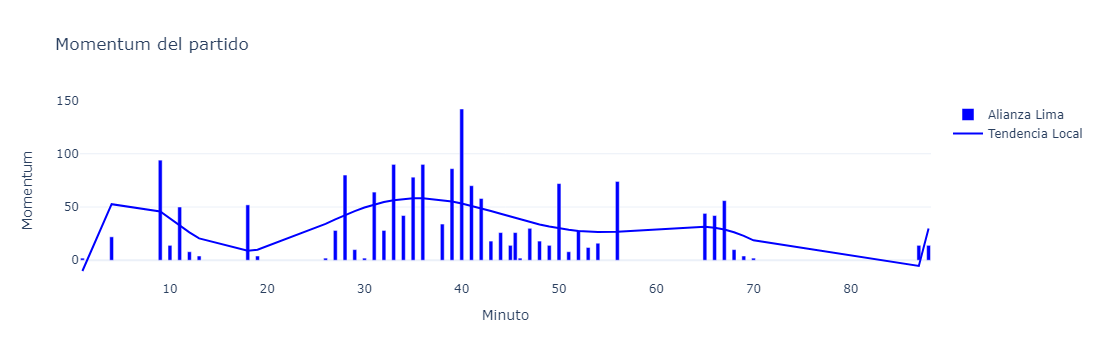

Datos exportados para la J1


KeyError: 'captain'

In [28]:
# Uso de la función
directorio = r'C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\Error 11 de Abril\\'
exportar_datos_jornada_a_csv(nombres_jornadas, URLs_jornadas, directorio)

### Jornada 1 - Local vs Universidad Cesar Vallejo - Estadísticas del Equipo

Estadistica  Completado Intentado
0        Expected goals        2.55         -
0       Ball possession       39.00         -
0           Total shots       21.00         -
1       Shots on target        8.00         -
2      Shots off target        9.00         -
3         Blocked shots        4.00         -
0          Corner kicks        7.00         -
1              Offsides        1.00         -
2                 Fouls        8.00         -
3          Yellow cards        1.00         -
4             Red cards        1.00         -
5            Free kicks        5.00         -
6             Throw-ins       28.00         -
7            Goal kicks        2.00         -
0           Big chances        2.00         -
1    Big chances missed        2.00         -
2          Hit woodwork        1.00         -
3       Counter attacks        3.00         -
4  Counter attack shots        3.00         -
5      Shots inside box       15.00         -
6     Shots outside box        6.00         -
7      Goalkeeper saves        0.00         -
0                Passes      298.00         -
1       Accurate passes      206.00         -
2            Long balls       18.00      40.0
3               Crosses        6.00      18.0
0              Dribbles        3.00       6.0
1       Possession lost      147.00         -
2             Duels won       43.00         -
3           Aerials won       10.00         -
0               Tackles       25.00         -
1         Interceptions       11.00         -
2            Clearances       21.00         -

### Jornada 1 - Local vs Universidad Cesar Vallejo - Información de Jugadores

name      shortName position jerseyNumber    country  \
0        Franco Saravia     F. Saravia        G           32       Peru   
1         Jiovany Ramos       J. Ramos        D           29     Panama   
2        Aldair Fuentes     A. Fuentes        M           20       Peru   
3          Juan Freytes     J. Freytes        D            2  Argentina   
4           Kevin Serna       K. Serna        M           26   Colombia   
5        Adrián Arregui     A. Arregui        M            5  Argentina   
6      Catriel Cabellos    C. Cabellos        M           27       Peru   
7         Ricardo Lagos       R. Lagos        D           13       Peru   
8      Cecilio Waterman    C. Waterman        F           30     Panama   
9   Sebastián Rodríguez   S. Rodríguez        M           10    Uruguay   
10        Hernán Barcos      H. Barcos        F            9  Argentina   
11       Jesús Castillo    J. Castillo        M           15       Peru   
12     Franco Zanelatto   F. Zanelatto        M            7       Peru   
13         Renzo Garces      R. Garces        D            6       Peru   
14     Ángel De la Cruz  Á. D. l. Cruz        G           12       Peru   
15    Nicolas Amasifuen   N. Amasifuen        D            4       Peru   
16        Yordi Vílchez     Y. Vílchez        D           31       Peru   
17        Gabriel Costa       G. Costa        M            8       Peru   
18        Piero Vivanco     P. Vivanco        M           16       Peru   
19      Jhamir D´Arrigo    J. D´Arrigo        M           11       Peru   

    substitute totalPass accuratePass totalLongBalls accurateLongBalls  ...  \
0        False      12.0         10.0            8.0               6.0  ...   
1        False      36.0         27.0            3.0               1.0  ...   
2        False      33.0         22.0            6.0               1.0  ...   
3        False      35.0         22.0           10.0               3.0  ...   
4        False      24.0         16.0            3.0               1.0  ...   
5        False      31.0         22.0            1.0               1.0  ...   
6        False      36.0         23.0            5.0               3.0  ...   
7        False      22.0         12.0            0.0               0.0  ...   
8        False       9.0          9.0            0.0               0.0  ...   
9        False      23.0         20.0            3.0               2.0  ...   
10       False      26.0         15.0            1.0               0.0  ...   
11        True       4.0          3.0            0.0               0.0  ...   
12        True       7.0          5.0            0.0               0.0  ...   
13        True       0.0          0.0            0.0               0.0  ...   
14        True       0.0          0.0            0.0               0.0  ...   
15        True       0.0          0.0            0.0               0.0  ...   
16        True       0.0          0.0            0.0               0.0  ...   
17        True       0.0          0.0            0.0               0.0  ...   
18        True       0.0          0.0            0.0               0.0  ...   
19        True       0.0          0.0            0.0               0.0  ...   

   totalContest wonContest onTargetScoringAttempt goalAssist bigChanceMissed  \
0           0.0        0.0                    0.0        0.0             0.0   
1           0.0        0.0                    0.0        0.0             0.0   
2           0.0        0.0                    0.0        0.0             0.0   
3           1.0        1.0                    1.0        0.0             0.0   
4           5.0        2.0                    0.0        1.0             1.0   
5           0.0        0.0                    1.0        0.0             1.0   
6           0.0        0.0                    2.0        0.0             0.0   
7           0.0        0.0                    0.0        0.0             0.0   
8           0.0        0.0                    2.0        0.0   

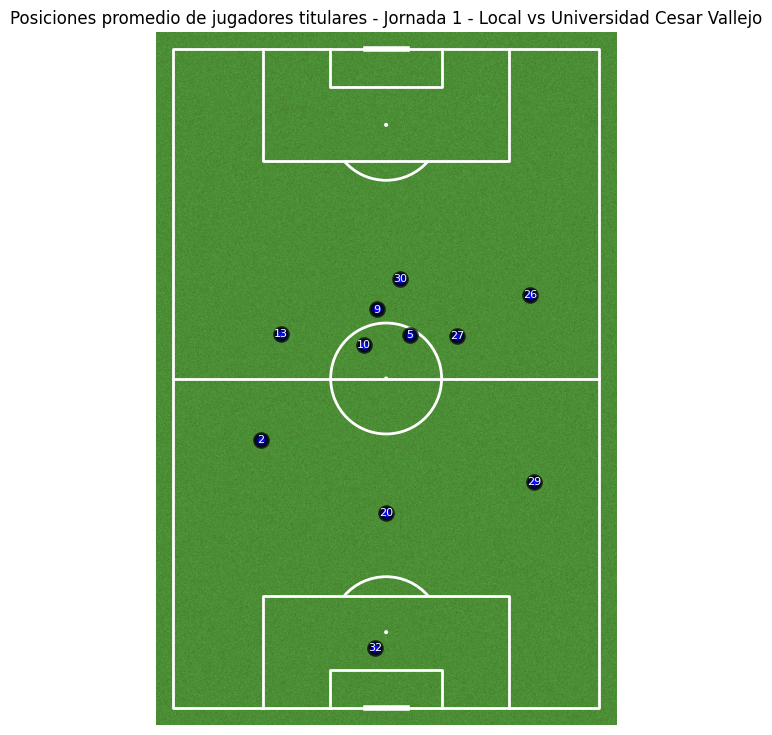

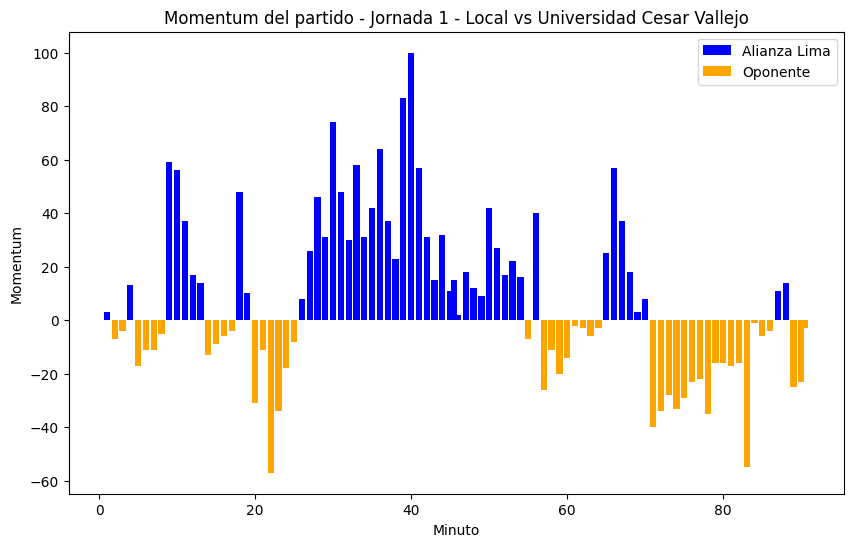

### Jornada 2 - Visita vs Alianza Atlético de Sullana - Estadísticas del Equipo

Estadistica  Completado Intentado
0      Expected goals         1.3         -
0     Ball possession        60.0         -
0         Total shots         8.0         -
1     Shots on target         4.0         -
2    Shots off target         4.0         -
3       Blocked shots         0.0         -
0        Corner kicks         2.0         -
1            Offsides         2.0         -
2               Fouls        12.0         -
3        Yellow cards         3.0         -
4           Red cards         0.0         -
5          Free kicks        12.0         -
6           Throw-ins        28.0         -
7          Goal kicks         5.0         -
0         Big chances         4.0         -
1  Big chances missed         2.0         -
2        Hit woodwork         0.0         -
3    Shots inside box         5.0         -
4   Shots outside box         3.0         -
5    Goalkeeper saves         1.0         -
0              Passes       376.0         -
1     Accurate passes       284.0         -
2          Long balls        31.0      60.0
3             Crosses         3.0      12.0
0            Dribbles         5.0       7.0
1     Possession lost       141.0         -
2           Duels won        43.0         -
3         Aerials won        16.0         -
0             Tackles        10.0         -
1       Interceptions         3.0         -
2          Clearances        13.0         -

### Jornada 2 - Visita vs Alianza Atlético de Sullana - Información de Jugadores

name      shortName position jerseyNumber    country  \
0        Franco Saravia     F. Saravia        G           32       Peru   
1         Jiovany Ramos       J. Ramos        D           29     Panama   
2        Aldair Fuentes     A. Fuentes        M           20       Peru   
3          Juan Freytes     J. Freytes        D            2  Argentina   
4           Kevin Serna       K. Serna        M           26   Colombia   
5      Catriel Cabellos    C. Cabellos        M           27       Peru   
6   Sebastián Rodríguez   S. Rodríguez        M           10    Uruguay   
7        Jesús Castillo    J. Castillo        M           15       Peru   
8         Ricardo Lagos       R. Lagos        D           13       Peru   
9      Cecilio Waterman    C. Waterman        F           30     Panama   
10        Hernán Barcos      H. Barcos        F            9  Argentina   
11      Jhamir D´Arrigo    J. D´Arrigo        M           11       Peru   
12         Renzo Garces      R. Garces        D            6       Peru   
13          Axel Moyano      A. Moyano        M           14       Peru   
14        Gabriel Costa       G. Costa        M            8       Peru   
15     Ángel De la Cruz  Á. D. l. Cruz        G           12       Peru   
16     Sebastian Aranda      S. Aranda        D           21       Peru   
17        Yordi Vílchez     Y. Vílchez        D           31       Peru   
18    Nicolas Amasifuen   N. Amasifuen        D            4       Peru   
19        Piero Vivanco     P. Vivanco        M           16       Peru   

    substitute totalPass accuratePass totalLongBalls accurateLongBalls  ...  \
0        False      20.0         14.0           11.0               6.0  ...   
1        False      48.0         40.0            7.0               4.0  ...   
2        False      22.0         17.0            2.0               1.0  ...   
3        False      48.0         39.0           10.0               6.0  ...   
4        False      23.0         14.0            3.0               2.0  ...   
5        False      25.0         20.0            1.0               1.0  ...   
6        False      70.0         59.0            9.0               7.0  ...   
7        False      26.0         12.0            6.0               0.0  ...   
8        False      17.0          7.0            5.0               1.0  ...   
9        False       5.0          3.0            0.0               0.0  ...   
10       False      30.0         19.0            3.0               0.0  ...   
11        True      11.0         11.0            0.0               0.0  ...   
12        True      13.0         11.0            1.0               1.0  ...   
13        True       9.0          9.0            1.0               1.0  ...   
14        True       9.0          9.0            1.0               1.0  ...   
15        True       0.0          0.0            0.0               0.0  ...   
16        True       0.0          0.0            0.0               0.0  ...   
17        True       0.0          0.0            0.0               0.0  ...   
18        True       0.0          0.0            0.0               0.0  ...   
19        True       0.0          0.0            0.0               0.0  ...   

   wonContest totalOffside bigChanceCreated onTargetScoringAttempt goals  \
0         0.0          0.0              0.0                    0.0   0.0   
1         0.0          0.0              0.0                    0.0   0.0   
2         0.0          0.0              0.0                    0.0   0.0   
3         0.0          0.0              0.0                    0.0   0.0   
4         2.0          1.0              0.0                    0.0   0.0   
5         1.0          1.0              0.0                    0.0   0.0   
6         1.0          0.0              1.0                    1.0   1.0   
7         0.0          0.0              1.0                    0.0   0.0   
8         0.0          0.0              0.0                    0.0   0.0   
9         0.0          

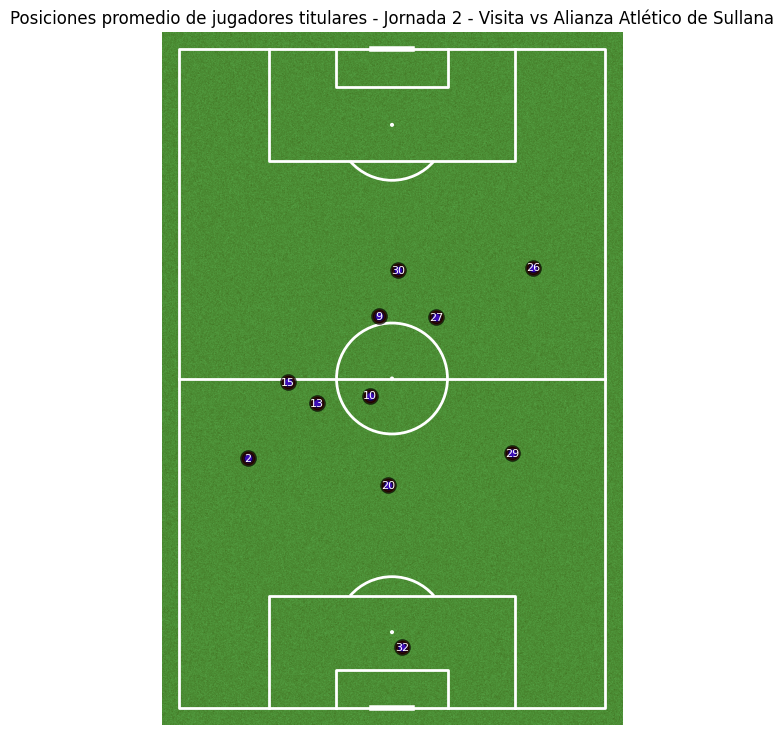

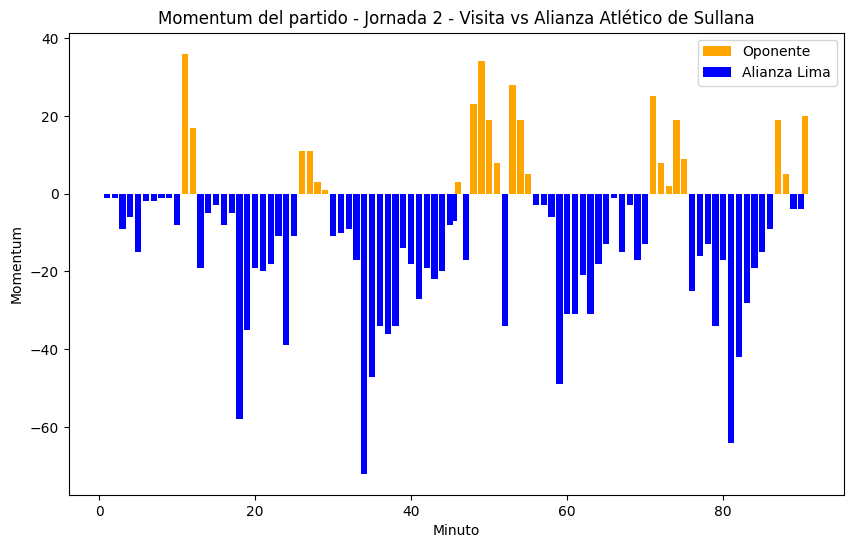

### Jornada 3 - Local vs Universitario de Deportes - Estadísticas del Equipo

Estadistica  Completado Intentado
0      Expected goals        1.43         -
0     Ball possession       61.00         -
0         Total shots       18.00         -
1     Shots on target        5.00         -
2    Shots off target       10.00         -
3       Blocked shots        3.00         -
0        Corner kicks        8.00         -
1            Offsides        2.00         -
2               Fouls       15.00         -
3        Yellow cards        2.00         -
4           Red cards        2.00         -
5          Free kicks       14.00         -
6           Throw-ins       24.00         -
7          Goal kicks       11.00         -
0         Big chances        2.00         -
1  Big chances missed        2.00         -
2        Hit woodwork        1.00         -
3    Shots inside box       10.00         -
4   Shots outside box        8.00         -
5    Goalkeeper saves        4.00         -
0              Passes      400.00         -
1     Accurate passes      313.00         -
2          Long balls       37.00      70.0
3             Crosses        6.00      21.0
0            Dribbles        5.00       9.0
1     Possession lost      143.00         -
2           Duels won       44.00         -
3         Aerials won       14.00         -
0             Tackles       11.00         -
1       Interceptions        5.00         -
2          Clearances        3.00         -

### Jornada 3 - Local vs Universitario de Deportes - Información de Jugadores

name      shortName position jerseyNumber    country  \
0        Franco Saravia     F. Saravia        G           32       Peru   
1         Jiovany Ramos       J. Ramos        D           29     Panama   
2        Aldair Fuentes     A. Fuentes        M           20       Peru   
3          Juan Freytes     J. Freytes        D            2  Argentina   
4           Kevin Serna       K. Serna        M           26   Colombia   
5      Catriel Cabellos    C. Cabellos        M           27       Peru   
6        Adrián Arregui     A. Arregui        M            5  Argentina   
7   Sebastián Rodríguez   S. Rodríguez        M           10    Uruguay   
8       Jhamir D´Arrigo    J. D´Arrigo        M           11       Peru   
9      Cecilio Waterman    C. Waterman        F           30     Panama   
10        Hernán Barcos      H. Barcos        F            9  Argentina   
11         Renzo Garces      R. Garces        D            6       Peru   
12        Gabriel Costa       G. Costa        M            8       Peru   
13     Franco Zanelatto   F. Zanelatto        M            7       Peru   
14         Marco Huaman      M. Huaman        D           25       Peru   
15        Ricardo Lagos       R. Lagos        D           13       Peru   
16     Ángel De la Cruz  Á. D. l. Cruz        G           12       Peru   
17          Axel Moyano      A. Moyano        M           14       Peru   
18       Jesús Castillo    J. Castillo        M           15       Peru   
19        Piero Vivanco     P. Vivanco        M           16       Peru   

    substitute totalPass accuratePass totalLongBalls accurateLongBalls  ...  \
0        False      24.0         19.0           10.0               6.0  ...   
1        False      38.0         32.0            7.0               4.0  ...   
2        False      34.0         31.0            2.0               1.0  ...   
3        False      65.0         45.0           21.0               6.0  ...   
4        False      21.0         17.0            3.0               2.0  ...   
5        False      11.0         11.0            0.0               0.0  ...   
6        False      42.0         33.0            4.0               3.0  ...   
7        False      44.0         38.0            6.0               5.0  ...   
8        False      22.0         17.0            4.0               2.0  ...   
9        False      11.0          4.0            1.0               0.0  ...   
10       False      18.0         13.0            0.0               0.0  ...   
11        True      19.0         15.0            4.0               3.0  ...   
12        True      24.0         21.0            3.0               3.0  ...   
13        True      10.0          8.0            1.0               1.0  ...   
14        True      11.0          7.0            4.0               1.0  ...   
15        True       6.0          2.0            0.0               0.0  ...   
16        True       0.0          0.0            0.0               0.0  ...   
17        True       0.0          0.0            0.0               0.0  ...   
18        True       0.0          0.0            0.0               0.0  ...   
19        True       0.0          0.0            0.0               0.0  ...   

   wasFouled keyPass bigChanceCreated blockedScoringAttempt challengeLost  \
0        0.0     0.0              0.0                   0.0           0.0   
1        0.0     0.0              0.0                   0.0           0.0   
2        0.0     0.0              0.0                   0.0           0.0   
3        1.0     1.0              0.0                   0.0           0.0   
4        3.0     1.0              1.0                   1.0           0.0   
5        2.0     0.0              0.0                   0.0           2.0   
6        0.0     1.0              0.0                   0.0           2.0   
7        1.0     3.0              0.0                   0.0           0.0   
8        2.0     1.0              0.0                   1.0           1.0   
9        2.0 

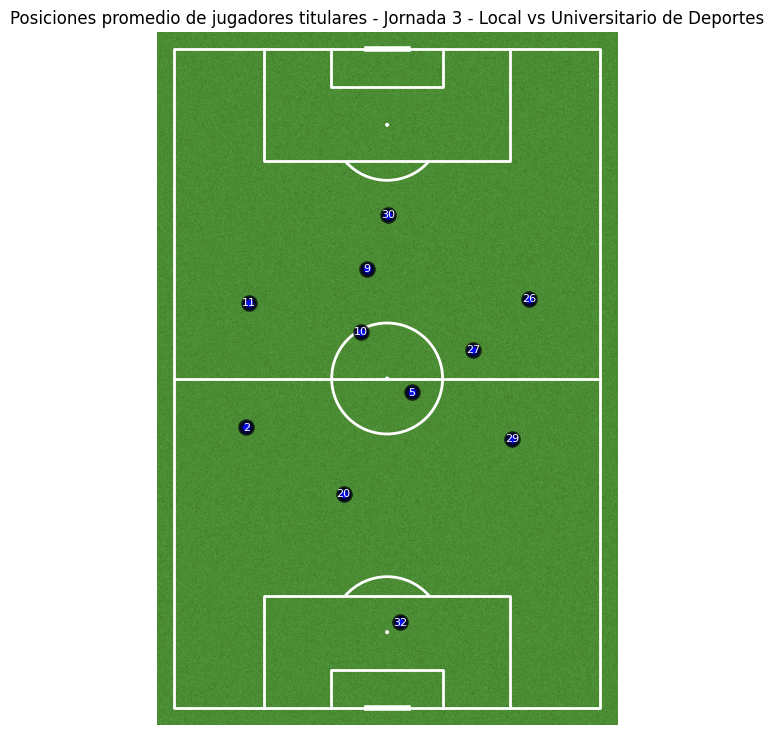

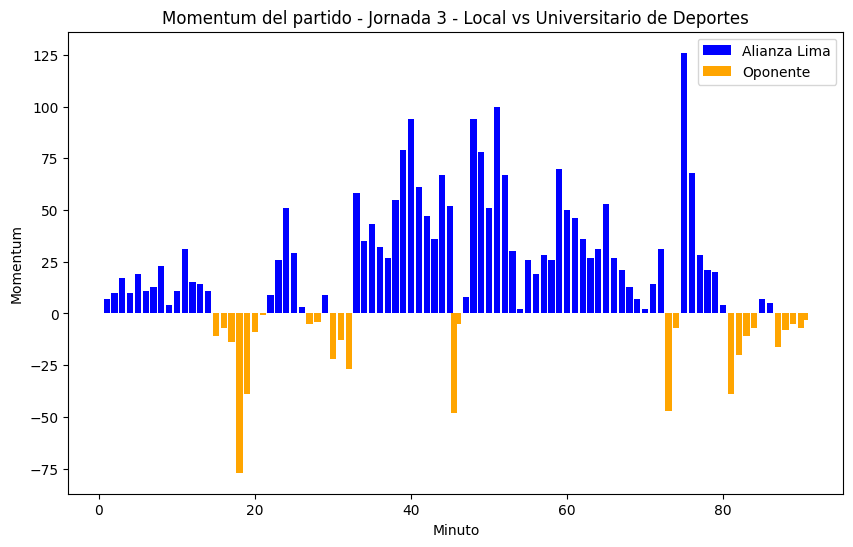

### Jornada 4 - Visita vs Unión Comercio - Estadísticas del Equipo

Estadistica  Completado Intentado
0        Expected goals        1.56         -
0       Ball possession       54.00         -
0           Total shots       14.00         -
1       Shots on target        5.00         -
2      Shots off target        6.00         -
3         Blocked shots        3.00         -
0          Corner kicks        8.00         -
1              Offsides        3.00         -
2                 Fouls        8.00         -
3          Yellow cards        2.00         -
4             Red cards        0.00         -
5            Free kicks       12.00         -
6             Throw-ins       17.00         -
7            Goal kicks        7.00         -
0           Big chances        6.00         -
1    Big chances missed        4.00         -
2       Counter attacks        2.00         -
3  Counter attack shots        2.00         -
4      Shots inside box       11.00         -
5     Shots outside box        3.00         -
6      Goalkeeper saves        3.00         -
0                Passes      347.00         -
1       Accurate passes      265.00         -
2            Long balls       19.00      49.0
3               Crosses        7.00      18.0
0              Dribbles        5.00       8.0
1       Possession lost      124.00         -
2             Duels won       40.00         -
3           Aerials won        8.00         -
0               Tackles       15.00         -
1         Interceptions        8.00         -
2            Clearances        7.00         -

### Jornada 4 - Visita vs Unión Comercio - Información de Jugadores

name      shortName position jerseyNumber    country  \
0      Ángel De la Cruz  Á. D. l. Cruz        G           12       Peru   
1      Catriel Cabellos    C. Cabellos        M           27       Peru   
2          Renzo Garces      R. Garces        D            6       Peru   
3          Juan Freytes     J. Freytes        D            2  Argentina   
4         Ricardo Lagos       R. Lagos        D           13       Peru   
5           Kevin Serna       K. Serna        M           26   Colombia   
6        Adrián Arregui     A. Arregui        M            5  Argentina   
7   Sebastián Rodríguez   S. Rodríguez        M           10    Uruguay   
8         Gabriel Costa       G. Costa        M            8       Peru   
9         Hernán Barcos      H. Barcos        F            9  Argentina   
10     Cecilio Waterman    C. Waterman        F           30     Panama   
11       Jesús Castillo    J. Castillo        M           15       Peru   
12       Aldair Fuentes     A. Fuentes        M           20       Peru   
13     Franco Zanelatto   F. Zanelatto        M            7       Peru   
14          Axel Moyano      A. Moyano        M           14       Peru   
15    Nicolas Amasifuen   N. Amasifuen        D            4       Peru   
16         Marco Huaman      M. Huaman        D           25       Peru   
17      Jhamir D´Arrigo    J. D´Arrigo        M           11       Peru   
18        Piero Vivanco     P. Vivanco        M           16       Peru   
19      Fabrisio Mesías      F. Mesías      0.0            1       Peru   

    substitute totalPass accuratePass totalLongBalls accurateLongBalls  ...  \
0        False      22.0          9.0           16.0               4.0  ...   
1        False      17.0         12.0            2.0               2.0  ...   
2        False      42.0         29.0           10.0               3.0  ...   
3        False      39.0         25.0           12.0               5.0  ...   
4        False      24.0         21.0            0.0               0.0  ...   
5        False      21.0         16.0            3.0               1.0  ...   
6        False      45.0         40.0            2.0               2.0  ...   
7        False      41.0         34.0            1.0               1.0  ...   
8        False      38.0         34.0            0.0               0.0  ...   
9        False      32.0         23.0            2.0               1.0  ...   
10       False      19.0         17.0            0.0               0.0  ...   
11        True       5.0          3.0            1.0               0.0  ...   
12        True       1.0          1.0            0.0               0.0  ...   
13        True       0.0          0.0            0.0               0.0  ...   
14        True       1.0          1.0            0.0               0.0  ...   
15        True       0.0          0.0            0.0               0.0  ...   
16        True       0.0          0.0            0.0               0.0  ...   
17        True       0.0          0.0            0.0               0.0  ...   
18        True       0.0          0.0            0.0               0.0  ...   
19        True       0.0          0.0            0.0               0.0  ...   

   challengeLost shotOffTarget onTargetScoringAttempt totalCross  \
0            0.0           0.0                    0.0        0.0   
1            0.0           0.0                    0.0        0.0   
2            0.0           0.0                    0.0        0.0   
3            1.0           1.0                    1.0        0.0   
4            1.0           1.0                    1.0        6.0   
5            2.0           0.0                    1.0        3.0   
6            1.0           0.0                    0.0        0.0   
7            1.0           1.0                    0.0        2.0   
8            0.0           0.0                    0.0        6.0   
9            0.0           1.0                    1.0        0.0   
10           0.0           1.0     

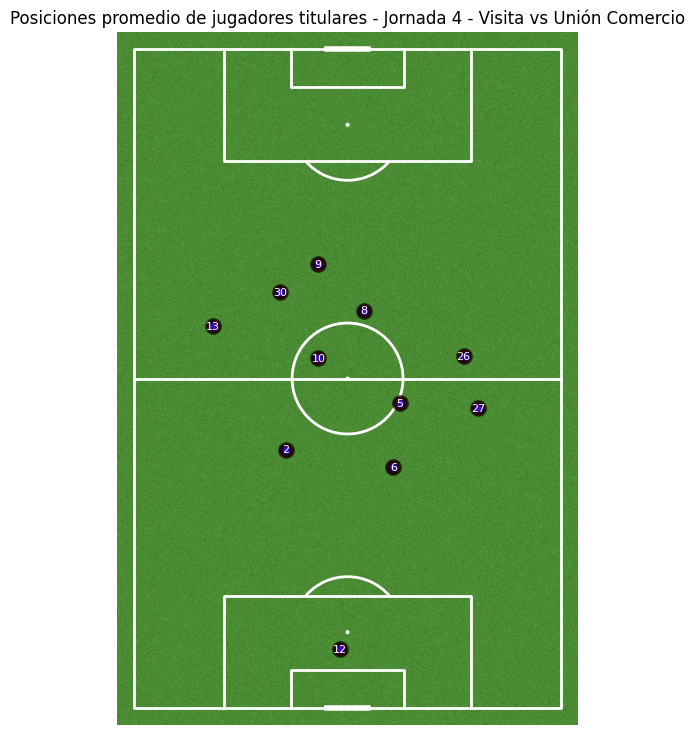

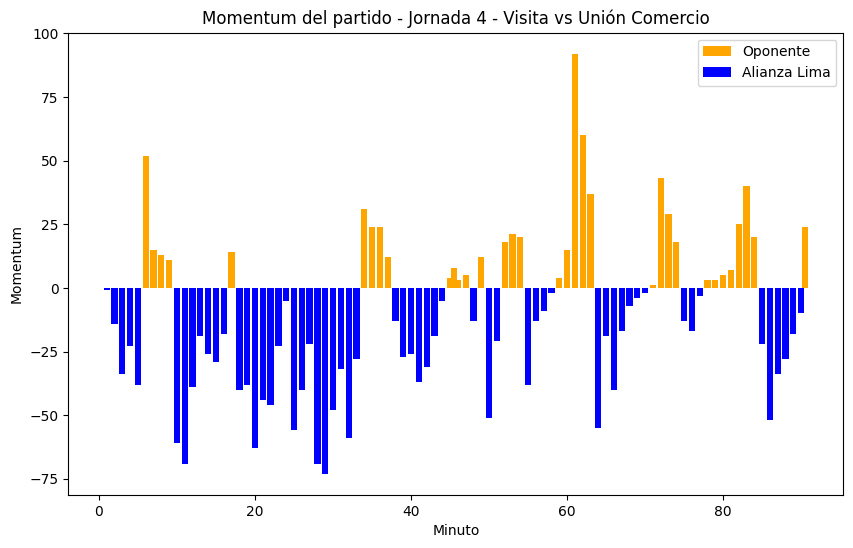

### Jornada 5 - Local vs Comerciantes Unidos - Estadísticas del Equipo

Estadistica  Completado Intentado
0        Expected goals        3.91         -
0       Ball possession       60.00         -
0           Total shots       24.00         -
1       Shots on target        8.00         -
2      Shots off target       13.00         -
3         Blocked shots        3.00         -
0          Corner kicks        9.00         -
1              Offsides        0.00         -
2                 Fouls       12.00         -
3          Yellow cards        2.00         -
4            Free kicks        8.00         -
5             Throw-ins       25.00         -
6            Goal kicks        4.00         -
0           Big chances        6.00         -
1    Big chances missed        2.00         -
2          Hit woodwork        1.00         -
3       Counter attacks        1.00         -
4  Counter attack shots        1.00         -
5  Counter attack goals        0.00         -
6      Shots inside box       17.00         -
7     Shots outside box        7.00         -
8      Goalkeeper saves        1.00         -
0                Passes      414.00         -
1       Accurate passes      348.00         -
2            Long balls       31.00      51.0
3               Crosses       11.00      28.0
0              Dribbles        5.00      12.0
1       Possession lost      125.00         -
2             Duels won       47.00         -
3           Aerials won       11.00         -
0               Tackles       23.00         -
1         Interceptions        7.00         -
2            Clearances        5.00         -

### Jornada 5 - Local vs Comerciantes Unidos - Información de Jugadores

name      shortName position jerseyNumber    country  \
0        Franco Saravia     F. Saravia        G           32       Peru   
1         Jiovany Ramos       J. Ramos        D           29     Panama   
2          Renzo Garces      R. Garces        D            6       Peru   
3          Juan Freytes     J. Freytes        D            2  Argentina   
4         Ricardo Lagos       R. Lagos        D           13       Peru   
5        Adrián Arregui     A. Arregui        M            5  Argentina   
6   Sebastián Rodríguez   S. Rodríguez        M           10    Uruguay   
7         Gabriel Costa       G. Costa        M            8       Peru   
8           Kevin Serna       K. Serna        M           26   Colombia   
9         Hernán Barcos      H. Barcos        F            9  Argentina   
10     Cecilio Waterman    C. Waterman        F           30     Panama   
11      Jhamir D´Arrigo    J. D´Arrigo        M           11       Peru   
12     Franco Zanelatto   F. Zanelatto        M            7       Peru   
13     Catriel Cabellos    C. Cabellos        M           27       Peru   
14          Axel Moyano      A. Moyano        M           14       Peru   
15        Víctor Guzmán      V. Guzmán        F           22       Peru   
16     Ángel De la Cruz  Á. D. l. Cruz        G           12       Peru   
17         Marco Huaman      M. Huaman        D           25       Peru   
18       Jesús Castillo    J. Castillo        M           15       Peru   
19       Aldair Fuentes     A. Fuentes        M           20       Peru   

    substitute totalPass accuratePass totalLongBalls accurateLongBalls  ...  \
0        False      20.0         17.0            5.0               2.0  ...   
1        False      36.0         25.0            8.0               2.0  ...   
2        False      47.0         45.0            5.0               4.0  ...   
3        False      64.0         60.0           11.0               8.0  ...   
4        False      19.0         15.0            1.0               0.0  ...   
5        False      46.0         34.0           12.0               7.0  ...   
6        False      66.0         61.0            5.0               4.0  ...   
7        False      40.0         33.0            3.0               3.0  ...   
8        False      17.0         12.0            0.0               0.0  ...   
9        False      14.0          9.0            1.0               1.0  ...   
10       False      12.0         11.0            0.0               0.0  ...   
11        True      16.0         11.0            0.0               0.0  ...   
12        True       2.0          2.0            0.0               0.0  ...   
13        True       7.0          6.0            0.0               0.0  ...   
14        True       3.0          3.0            0.0               0.0  ...   
15        True       5.0          4.0            0.0               0.0  ...   
16        True       0.0          0.0            0.0               0.0  ...   
17        True       0.0          0.0            0.0               0.0  ...   
18        True       0.0          0.0            0.0               0.0  ...   
19        True       0.0          0.0            0.0               0.0  ...   

   dispossessed wonContest goals challengeLost goalAssist bigChanceCreated  \
0           0.0        0.0   0.0           0.0        0.0              0.0   
1           0.0        0.0   0.0           0.0        0.0              0.0   
2           0.0        0.0   0.0           0.0        0.0              0.0   
3           0.0        0.0   0.0           0.0        0.0              0.0   
4           0.0        0.0   0.0           0.0        0.0              0.0   
5           2.0        1.0   1.0           0.0        0.0              0.0   
6           2.0        0.0   0.0           1.0        0.0              0.0   
7           0.0        0.0   1.0           0.0        0.0              0.0   
8           0.0        2.0   0.0           0.0        1.0              3.0   
9  

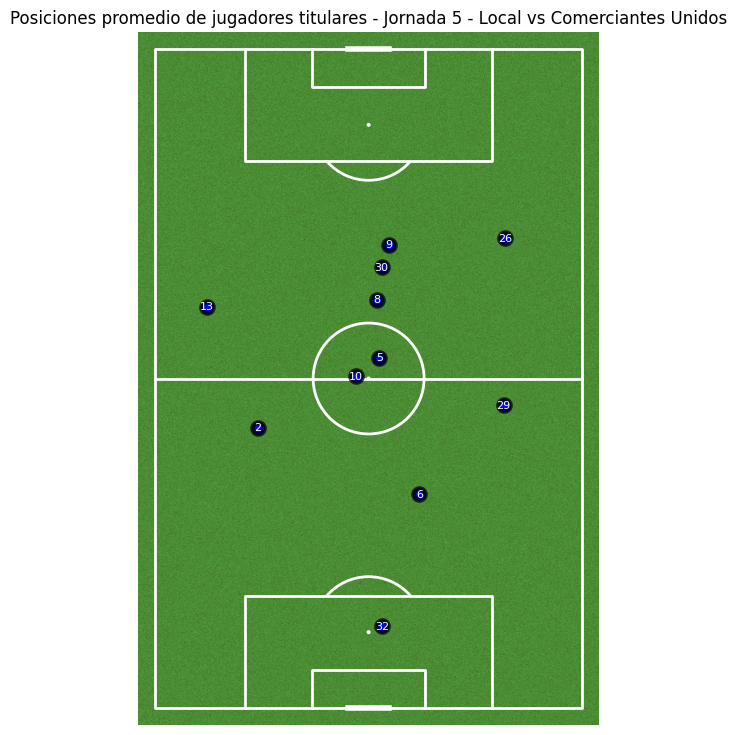

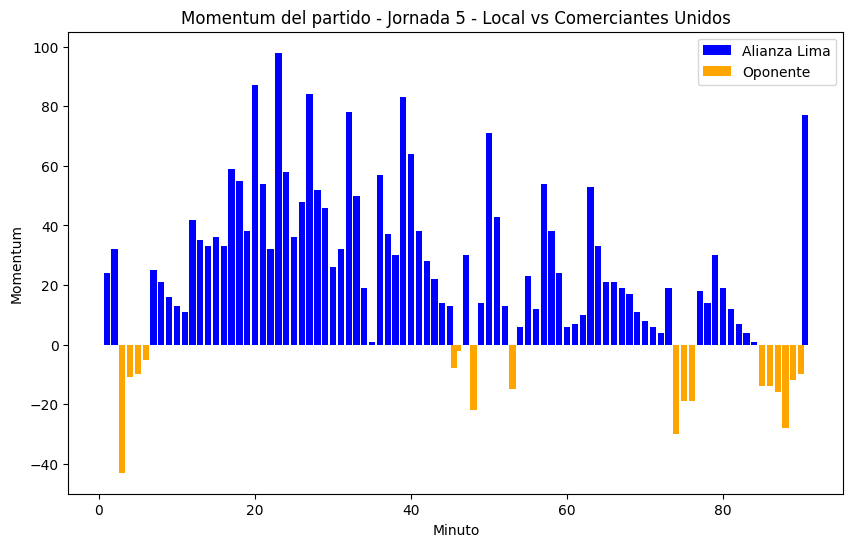

### Jornada 6 - Visita vs ADT - Estadísticas del Equipo

Estadistica  Completado  Intentado
0      Expected goals        0.87        NaN
0     Ball possession       34.00        NaN
0         Total shots        6.00        NaN
1     Shots on target        2.00        NaN
2    Shots off target        3.00        NaN
3       Blocked shots        1.00        NaN
0        Corner kicks        2.00        NaN
1            Offsides        1.00        NaN
2               Fouls       12.00        NaN
3        Yellow cards        1.00        NaN
4           Red cards        1.00        NaN
5          Free kicks        9.00        NaN
6           Throw-ins       24.00        NaN
7          Goal kicks        9.00        NaN
0         Big chances        0.00        NaN
1  Big chances missed        0.00        NaN
2        Hit woodwork        0.00        NaN
3    Shots inside box        4.00        NaN
4   Shots outside box        2.00        NaN
5    Goalkeeper saves        3.00        NaN
0              Passes      236.00        NaN
1     Accurate passes      134.00        NaN
2          Long balls       19.00       78.0
3             Crosses        1.00        8.0
0            Dribbles        2.00        4.0
1     Possession lost      143.00        NaN
2           Duels won       28.00        NaN
3         Aerials won        7.00        NaN
0             Tackles       10.00        NaN
1       Interceptions        5.00        NaN
2          Clearances       13.00        NaN

### Jornada 6 - Visita vs ADT - Información de Jugadores

name      shortName position jerseyNumber    country  \
0        Franco Saravia     F. Saravia        G           32       Peru   
1         Jiovany Ramos       J. Ramos        D           29     Panama   
2          Renzo Garces      R. Garces        D            6       Peru   
3          Juan Freytes     J. Freytes        D            2  Argentina   
4           Kevin Serna       K. Serna        M           26   Colombia   
5         Gabriel Costa       G. Costa        M            8       Peru   
6        Adrián Arregui     A. Arregui        M            5  Argentina   
7   Sebastián Rodríguez   S. Rodríguez        M           10    Uruguay   
8       Jhamir D´Arrigo    J. D´Arrigo        M           11       Peru   
9      Cecilio Waterman    C. Waterman        F           30     Panama   
10        Hernán Barcos      H. Barcos        F            9  Argentina   
11     Ángel De la Cruz  Á. D. l. Cruz        G           12       Peru   
12       Jesús Castillo    J. Castillo        M           15       Peru   
13     Franco Zanelatto   F. Zanelatto        M            7       Peru   
14        Víctor Guzmán      V. Guzmán        F           22       Peru   
15         Marco Huaman      M. Huaman        D           25       Peru   
16     Sebastian Aranda      S. Aranda        D           21       Peru   
17          Axel Moyano      A. Moyano        M           14       Peru   
18       Aldair Fuentes     A. Fuentes        M           20       Peru   
19     Catriel Cabellos    C. Cabellos        M           27       Peru   

    substitute totalPass accuratePass totalLongBalls accurateLongBalls  ...  \
0        False       7.0          1.0            6.0               1.0  ...   
1        False      22.0         14.0            9.0               3.0  ...   
2        False      13.0         10.0            4.0               1.0  ...   
3        False      31.0          9.0           16.0               3.0  ...   
4        False      19.0         12.0            3.0               1.0  ...   
5        False      10.0         10.0            0.0               0.0  ...   
6        False      26.0         14.0            7.0               2.0  ...   
7        False      22.0         15.0            3.0               1.0  ...   
8        False      19.0         13.0            3.0               1.0  ...   
9        False      11.0          9.0            0.0               0.0  ...   
10       False      16.0         12.0            1.0               0.0  ...   
11        True      26.0          8.0           24.0               6.0  ...   
12        True       8.0          4.0            1.0               0.0  ...   
13        True       5.0          3.0            1.0               0.0  ...   
14        True       1.0          0.0            0.0               0.0  ...   
15        True       0.0          0.0            0.0               0.0  ...   
16        True       0.0          0.0            0.0               0.0  ...   
17        True       0.0          0.0            0.0               0.0  ...   
18        True       0.0          0.0            0.0               0.0  ...   
19        True       0.0          0.0            0.0               0.0  ...   

   wonContest shotOffTarget accurateCross onTargetScoringAttempt  \
0         0.0           0.0           0.0                    0.0   
1         0.0           0.0           0.0                    0.0   
2         0.0           0.0           0.0                    0.0   
3         1.0           0.0           0.0                    0.0   
4         0.0           0.0           0.0                    0.0   
5         0.0           0.0           0.0                    0.0   
6         1.0           1.0           0.0                    0.0   
7         0.0           2.0           1.0                    0.0   
8         0.0           0.0           0.0                    0.0   
9         0.0           0.0           0.0                    2.0   
10        0.0           0.0        

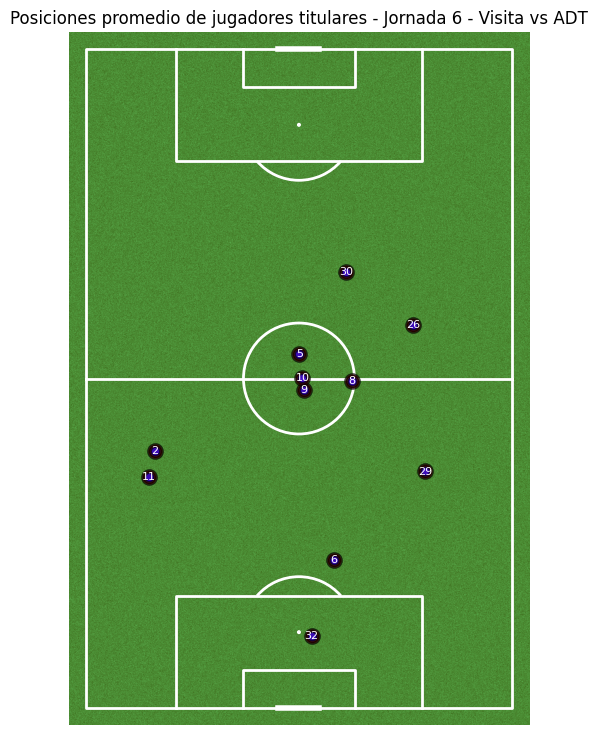

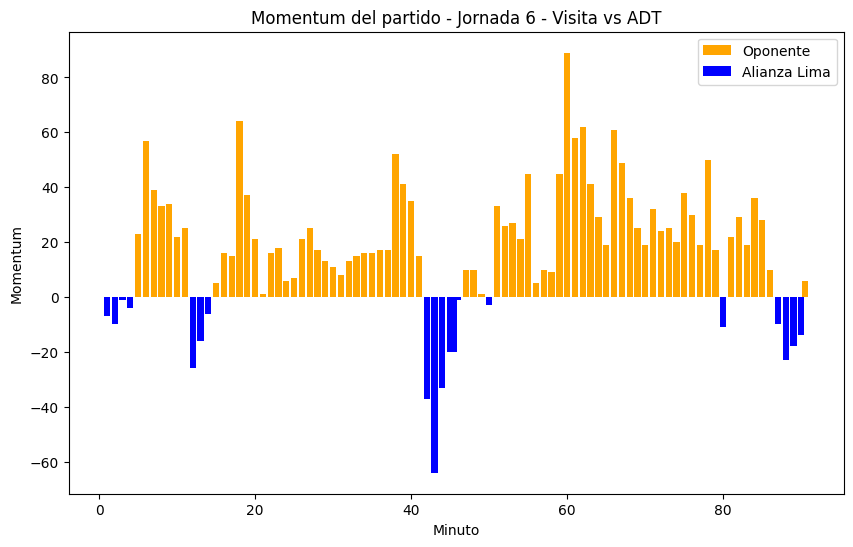

In [60]:
# Impresion del reporte (desactualizado)

from IPython.display import display, Markdown

for nombre_jornada, df in jornadas_df.items():
    # Procesa el DataFrame de estadísticas del equipo
    
    display(Markdown(f"### {nombre_jornada} - Estadísticas del Equipo"))
    display(df)
    
    display(Markdown(f"### {nombre_jornada} - Información de Jugadores"))
    display(jornadas_jugadores_df[nombre_jornada])

    # Comprobamos si Alianza Lima juega de local o visita en la jornada actual
    es_local = 'Local' in nombre_jornada
    
    # Combina los DataFrames para tener la información de si son suplentes y sus posiciones
    df_pos_jugadores = posicion_jugadores_dfs[nombre_jornada]
    
    df_combinado = df_pos_jugadores.merge(jornadas_jugadores_df[nombre_jornada], left_on='name', right_on='name')

    # Filtra para obtener solo los jugadores titulares (Suplente == False)
    df_titulares = df_combinado[df_combinado['substitute'] == False]
    
    
    # Crea el gráfico de posiciones promedio para los jugadores titulares
    fig, ax = plt.subplots(figsize=(16,9))
    pitch = VerticalPitch(pitch_type='opta', pitch_color='grass', line_color='white')
    pitch.draw(ax=ax)
    scatter_plot = pitch.scatter(df_titulares.averageX, df_titulares.averageY, ax=ax, s=100, color='blue' if es_local else 'red', edgecolors='black', linewidth=2, alpha=0.7)
    for index, row in df_titulares.iterrows():
        # Dibuja el marcador con pitch.scatter
        pitch.scatter(row['averageX'], row['averageY'], s=50, ax=ax, color='blue', edgecolors='black', linewidth=2, alpha=0.7)
        # Coloca el número del jersey encima del marcador
        ax.text(row['averageY'], row['averageX'], row['jerseyNumber_x'], fontsize=8, ha='center', va='center', color='white')

    plt.title(f"Posiciones promedio de jugadores titulares - {nombre_jornada}")
    plt.show()

    # Genera y muestra el gráfico de momentum para la jornada actual
    momentum_df = momentum_dfs[nombre_jornada]
    momentum_positivo = momentum_df[momentum_df['value'] > 0]
    momentum_negativo = momentum_df[momentum_df['value'] < 0]
    
    plt.figure(figsize=(10, 6))
    
    # Si Alianza Lima es local, sus valores positivos de momentum se muestran en azul
    # y los valores negativos (del equipo visitante) se muestran en naranja.
    # Si Alianza Lima es visitante, es al revés.
    plt.bar(momentum_positivo.minute, momentum_positivo.value, color='blue' if es_local else 'orange', label='Alianza Lima' if es_local else 'Oponente')
    plt.bar(momentum_negativo.minute, momentum_negativo.value, color='orange' if es_local else 'blue', label='Oponente' if es_local else 'Alianza Lima')

    plt.xlabel('Minuto')
    plt.ylabel('Momentum')
    plt.title(f"Momentum del partido - {nombre_jornada}")
    plt.legend()
    plt.show()
